# Background and data exploration

In [44]:


import gdown 
import pandas as pd
from sklearn import metrics



from google.cloud import storage
def download_public_file(bucket_name, source_blob_name, destination_file_name):
    storage_client = storage.Client.create_anonymous_client()

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

download_public_file('inspirit-ai-data-bucket-1','Data/AI Scholars/Sessions 1 - 5/Session 2b - Logistic Regression/cancer.csv','cancer_data.csv')

data = pd.read_csv('cancer_data.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer_data.csv')
del data

In [45]:

import os            
import numpy as np    
import pandas as pd   
from sklearn.metrics import accuracy_score   


In [46]:
data_path  = 'cancer_data.csv'

dataframe = pd.read_csv(data_path)

dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

In [48]:

dataframe.head()

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


In [49]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   diagnosis        569 non-null    int64   
 1   perimeter_mean   569 non-null    float64 
 2   radius_mean      569 non-null    float64 
 3   texture_mean     569 non-null    float64 
 4   area_mean        569 non-null    float64 
 5   smoothness_mean  569 non-null    float64 
 6   concavity_mean   569 non-null    float64 
 7   symmetry_mean    569 non-null    float64 
 8   diagnosis_cat    569 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 36.4 KB


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt 

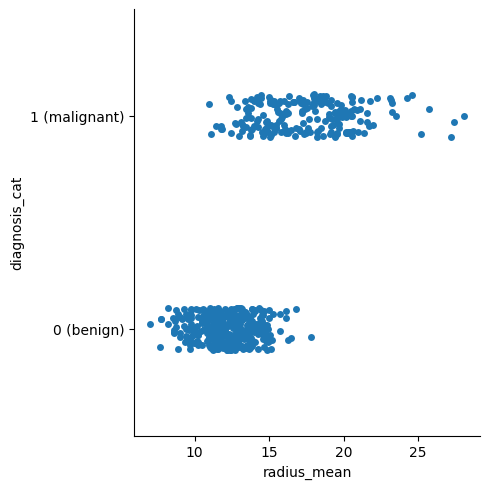

In [51]:
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)']) 


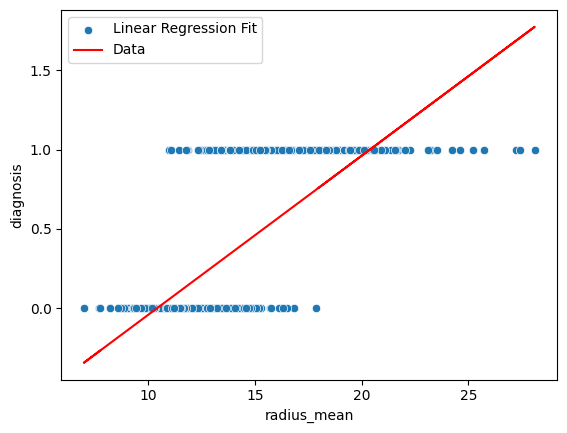

In [52]:
from sklearn import linear_model

X,y = dataframe[['radius_mean']], dataframe[['diagnosis']]

model = linear_model.LinearRegression()
model.fit(X, y)
preds = model.predict(X)

sns.scatterplot(x='radius_mean', y='diagnosis', data=dataframe)
plt.plot(X, preds, color='r')
plt.legend(['Linear Regression Fit', 'Data'])

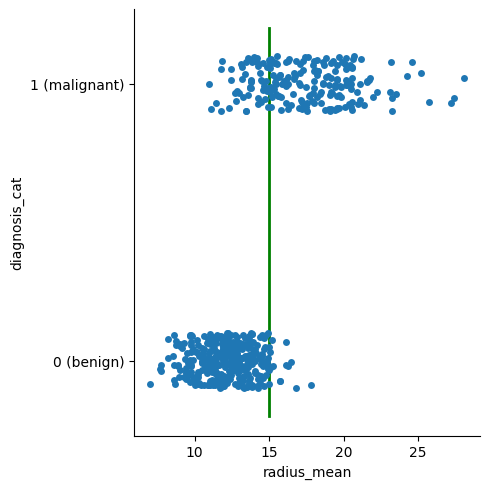

In [53]:
boundary = 15 # change me!

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([boundary, boundary], [-.2, 1.2], 'g', linewidth = 2)

In [54]:
def boundary_classifier(target_boundary, radius_mean_series):
  result = []
  for i in radius_mean_series:
    if i > target_boundary:
      result.append(1)
    else:
      result.append(0)
  return result

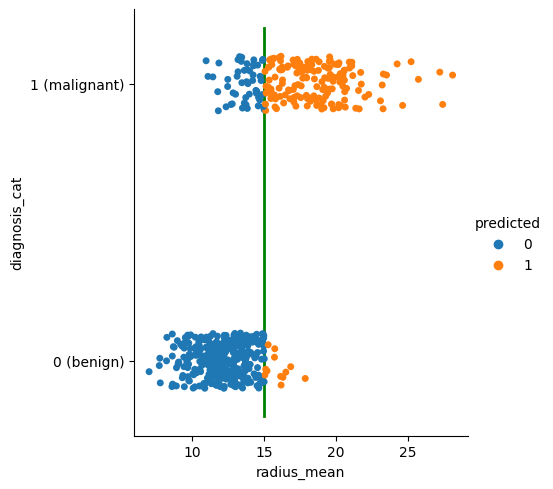

In [55]:
chosen_boundary = 15 #Try changing this!

y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([chosen_boundary, chosen_boundary], [-.2, 1.2], 'g', linewidth = 2)

What do you think of the results based on the graph?

We can take a look at `y_true` and `y_pred` - how similar do they look?

In [56]:
print (list(y_true))
print (y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

Let's calculate our accuracy!

In [57]:
accuracy = accuracy_score(y_true,y_pred)
print(accuracy)

0.8892794376098418


In [58]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

In [59]:
print('Number of rows in training dataframe:', train_df.shape[0])
train_df.head()

Number of rows in training dataframe: 455


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
408,1,117.80,17.99,20.66,991.7,0.10360,0.120100,0.1992,1 (malignant),1
4,1,135.10,20.29,14.34,1297.0,0.10030,0.198000,0.1809,1 (malignant),1
307,0,56.36,9.00,14.40,246.3,0.07005,0.003681,0.1788,0 (benign),0
386,0,78.78,12.21,14.09,462.0,0.08108,0.068390,0.1646,0 (benign),0
404,0,78.29,12.34,14.95,469.1,0.08682,0.021090,0.1571,0 (benign),0


In [60]:
print('Number of rows in test dataframe:', test_df.shape[0])
test_df.head()

Number of rows in test dataframe: 114


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
421,0,98.22,14.69,13.98,656.1,0.10310,0.14500,0.2086,0 (benign),0
47,1,85.98,13.17,18.66,534.6,0.11580,0.12260,0.2128,1 (malignant),0
292,0,83.14,12.95,16.02,513.7,0.10050,0.06155,0.1730,0 (benign),0
186,1,118.60,18.31,18.58,1041.0,0.08588,0.08169,0.1621,1 (malignant),1
414,1,96.71,15.13,29.81,719.5,0.08320,0.04686,0.1852,1 (malignant),1


In [61]:
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, our output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64


In [62]:
# Here, we create a 'logreg_model' object that handles the line fitting for us!
logreg_model = linear_model.LogisticRegression()

In [63]:
logreg_model = linear_model.LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [64]:
X_test = test_df[X]
y_test = test_df[y]

In [66]:
y_pred = logreg_model.predict(X_test)

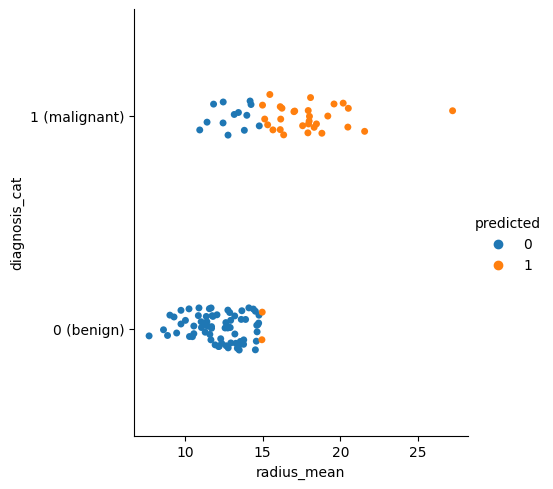

In [67]:
test_df['predicted'] = y_pred.squeeze()
sns.catplot(x = X[0], y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.868421052631579


<Axes: xlabel='radius_mean', ylabel='Predicted Probability'>

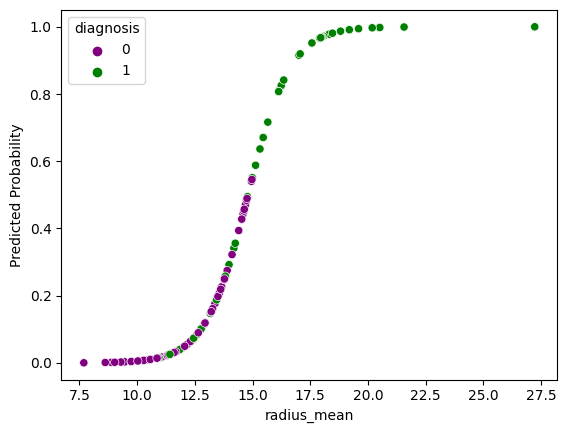

In [70]:
y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

In [71]:
dataframe.head(1)

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.8,17.99,10.38,1001.0,0.1184,0.3001,0.2419,1 (malignant),1


In [85]:
X = ['radius_mean']
y = 'diagnosis'

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

X_train, X_test = train_df[X], test_df[X]
y_train, y_test = train_df[y], test_df[y]

model = linear_model.LogisticRegression()

model.fit(X_train, y_train)

preds = model.predict(X_test)

accuracy = accuracy_score(y_test, preds)
print(X[0], accuracy)

radius_mean 0.868421052631579


In [74]:
dataframe.head(1)

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.8,17.99,10.38,1001.0,0.1184,0.3001,0.2419,1 (malignant),1


In [75]:
multi_X = ['perimeter_mean', 'radius_mean', 'texture_mean','area_mean']
y = 'diagnosis'

multi_train_df, multi_test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

multi_X_train, multi_X_test = multi_train_df[multi_X], multi_test_df[multi_X]
y_train, y_test = multi_train_df[y], multi_test_df[y]

model = linear_model.LogisticRegression()

model.fit(multi_X_train, y_train)

multi_preds = model.predict(multi_X_test)

accuracy = accuracy_score(y_test, multi_preds)
print(multi_X)
print(accuracy)

['perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean']
0.8771929824561403


Text(0.5, 427.9555555555555, 'Predicted diagnosis')

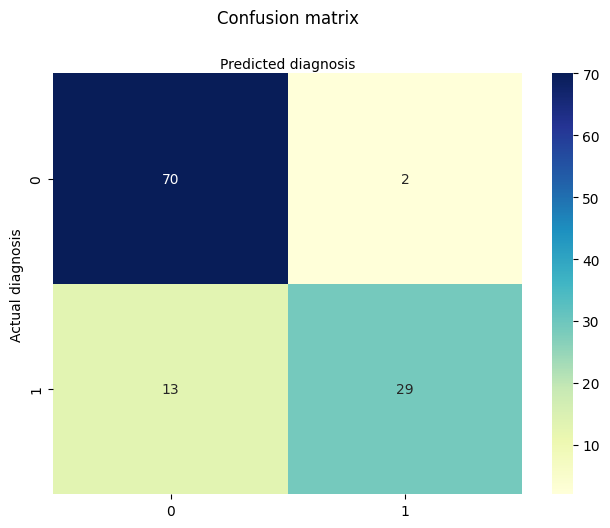

In [76]:

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [77]:
print (cnf_matrix)
(tn, fp), (fn, tp) = cnf_matrix
print ("TN, FP, FN, TP:", tn, fp, fn, tp)

[[70  2]
 [13 29]]
TN, FP, FN, TP: 70 2 13 29


In [78]:
accuracy = (tp + tn)/(tn + fp + fn + tp)
precision = (tp)/(tp + fp)
recall = tp/(tp + fn)

print ("accuracy, precision, recall", accuracy, precision, recall)

accuracy, precision, recall 0.868421052631579 0.9354838709677419 0.6904761904761905


In [79]:
from sklearn import tree

class_dt = tree.DecisionTreeClassifier(max_depth=3)

class_dt.fit(multi_X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 98.755\ngini = 0.468\nsamples = 455\nvalue = [285, 170]'),
 Text(0.25, 0.625, 'x[0] <= 89.995\ngini = 0.213\nsamples = 314\nvalue = [276, 38]'),
 Text(0.125, 0.375, 'x[0] <= 85.25\ngini = 0.108\nsamples = 263\nvalue = [248, 15]'),
 Text(0.0625, 0.125, 'gini = 0.046\nsamples = 214\nvalue = [209, 5]'),
 Text(0.1875, 0.125, 'gini = 0.325\nsamples = 49\nvalue = [39, 10]'),
 Text(0.375, 0.375, 'x[2] <= 19.75\ngini = 0.495\nsamples = 51\nvalue = [28, 23]'),
 Text(0.3125, 0.125, 'gini = 0.337\nsamples = 28\nvalue = [22, 6]'),
 Text(0.4375, 0.125, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(0.75, 0.625, 'x[2] <= 16.395\ngini = 0.12\nsamples = 141\nvalue = [9, 132]'),
 Text(0.625, 0.375, 'x[0] <= 117.4\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.5625, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.375, 'x[0] <= 108.85\ngini = 0.031\nsamples = 129\nvalue = [2, 127

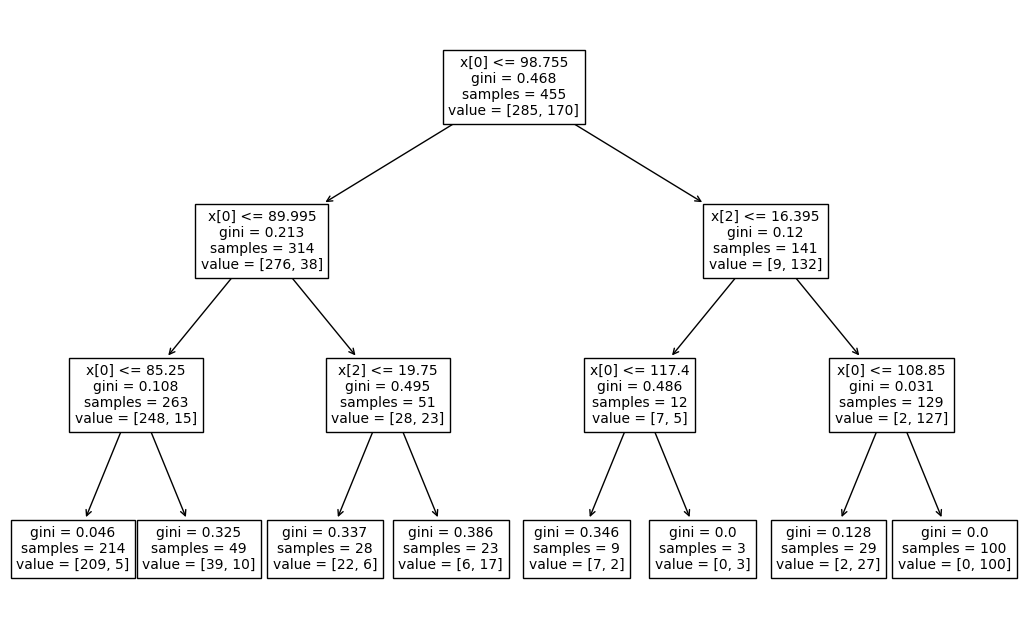

In [80]:
plt.figure(figsize=(13,8))  
tree.plot_tree(class_dt, fontsize=10) 

In [81]:

multi_y_pred = class_dt.predict(multi_X_test)

In [82]:
print("Accuracy: ", metrics.accuracy_score(y_test, multi_y_pred))
print("Precision: ", metrics.precision_score(y_test, multi_y_pred))
print("Recall: ", metrics.recall_score(y_test, multi_y_pred))

Accuracy:  0.8596491228070176
Precision:  0.8611111111111112
Recall:  0.7380952380952381


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [84]:

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()] 


for classifier in classifiers:
  print("---------------")
  print(str(classifier) + '\n')
  classifier.fit(multi_X_train, y_train)
  multi_y_pred = classifier.predict(multi_X_test)
  print("Accuracy: ", metrics.accuracy_score(y_test, multi_y_pred))
  print("Precision: ", metrics.precision_score(y_test, multi_y_pred))
  print("Recall: ", metrics.recall_score(y_test, multi_y_pred)) 

  print("---------------")



---------------
KNeighborsClassifier(n_neighbors=3)

Accuracy:  0.8508771929824561
Precision:  0.8378378378378378
Recall:  0.7380952380952381
---------------
---------------
SVC(C=0.025, kernel='linear')

Accuracy:  0.8596491228070176
Precision:  0.8421052631578947
Recall:  0.7619047619047619
---------------
---------------
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))



/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Accuracy:  0.868421052631579
Precision:  0.8461538461538461
Recall:  0.7857142857142857
---------------
---------------
DecisionTreeClassifier(max_depth=5)

Accuracy:  0.8596491228070176
Precision:  0.8611111111111112
Recall:  0.7380952380952381
---------------
---------------
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

Accuracy:  0.8596491228070176
Precision:  0.8823529411764706
Recall:  0.7142857142857143
---------------
---------------
MLPClassifier(alpha=1, max_iter=1000)

Accuracy:  0.8421052631578947
Precision:  1.0
Recall:  0.5714285714285714
---------------
---------------
AdaBoostClassifier()

Accuracy:  0.8596491228070176
Precision:  0.8421052631578947
Recall:  0.7619047619047619
---------------
---------------
GaussianNB()

Accuracy:  0.8771929824561403
Precision:  0.9375
Recall:  0.7142857142857143
---------------
---------------
QuadraticDiscriminantAnalysis()

Accuracy:  0.9035087719298246
Precision:  0.9428571428571428
Recall:  0.785714285714285